In [7]:
# Importing standard Qiskit libraries
from qiskit import QuantumCircuit, transpile
from qiskit.tools.jupyter import *
# from qiskit.visualization import *
from ibm_quantum_widgets import *
from qiskit.visualization import plot_histogram
from qiskit_ibm_runtime import QiskitRuntimeService, Sampler, Estimator, Session
# Import Aer
from qiskit import Aer
# Loading your IBM Quantum account(s)
service = QiskitRuntimeService(channel="ibm_quantum")
# Create a Quantum Circuit acting on a quantum register of three qubits
qc = QuantumCircuit(3)

In [8]:
# After you creating the circuit with its registers, add gates ("operations"
# By default, each qubit in the register is initialized to |0>
# QIT, a Greenberger–Horne–Zeilinger state (GHZ state) is a certain type of
# to make a GHZ state, we need to do the following
# 1. A Hadmard Gate H on quibit q_0, such that q_0 = (|0> + |1>)/sqrt(2)
# 2. A controlled-Nit operation CNOT between q_0 and q_1
# 3. A controlled-Not operation CNOT between q_0 and q_2
# Add an H gate on qubit q_0, putting this qubit in superposition.
qc.h(0)
# Add a CX (CNOT) gate on control qubit q_0 and target qubit q_1, putting
# the qubits in a Bell state.
qc.cx(0, 1)
# Add a CX (CNOT) gate on control qubit q_0 and target qubit q_2, putting
# the qubits in a GHZ state.
qc.cx(0, 2)

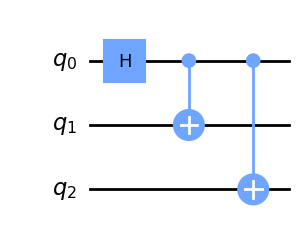

In [9]:
qc.draw('mpl')

In [10]:
# Run the quantum circuit on a statevector simulator backend
backend = Aer.get_backend('statevector_simulator')
# Create a Quantum Program for execution
job = backend.run(qc)
result = job.result()

In [11]:
outputstate = result.get_statevector(qc, decimals=3)
print(outputstate)

Statevector([0.707+0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j, 0.   +0.j,
             0.   +0.j, 0.   +0.j, 0.707+0.j],
            dims=(2, 2, 2))


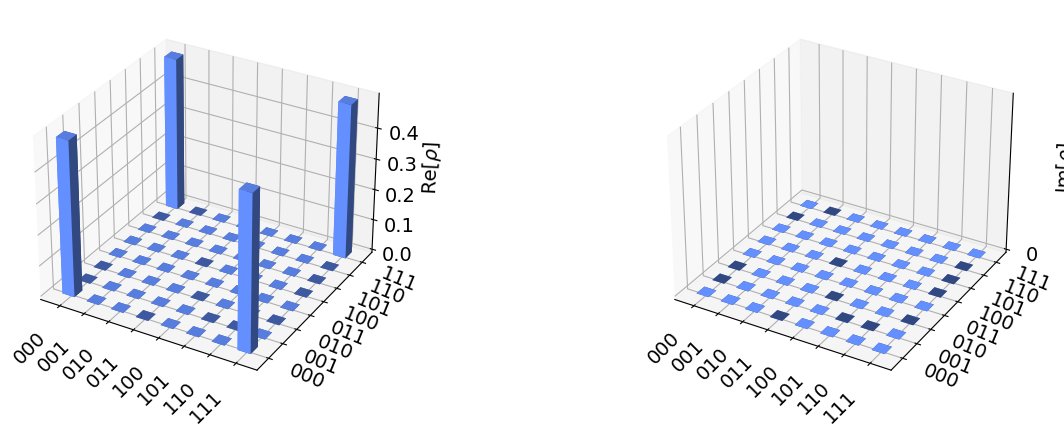

In [12]:
from qiskit.visualization import plot_state_city
plot_state_city(outputstate)